In [ ]:
# !pip install torch torchvision matplotlib DataLoader

Epoch 1 - Training loss: 1.1679 - Validation loss: 0.5035
Epoch 2 - Training loss: 0.4200 - Validation loss: 0.3595
Epoch 3 - Training loss: 0.3480 - Validation loss: 0.3451
Epoch 4 - Training loss: 0.3142 - Validation loss: 0.2977
Epoch 5 - Training loss: 0.2891 - Validation loss: 0.2722
Epoch 6 - Training loss: 0.2686 - Validation loss: 0.2551
Epoch 7 - Training loss: 0.2509 - Validation loss: 0.2436
Epoch 8 - Training loss: 0.2331 - Validation loss: 0.2253
Epoch 9 - Training loss: 0.2172 - Validation loss: 0.2173
Epoch 10 - Training loss: 0.2027 - Validation loss: 0.2115
Epoch 11 - Training loss: 0.1896 - Validation loss: 0.1909
Epoch 12 - Training loss: 0.1776 - Validation loss: 0.1779
Epoch 13 - Training loss: 0.1670 - Validation loss: 0.1692
Epoch 14 - Training loss: 0.1572 - Validation loss: 0.1632
Training completed.


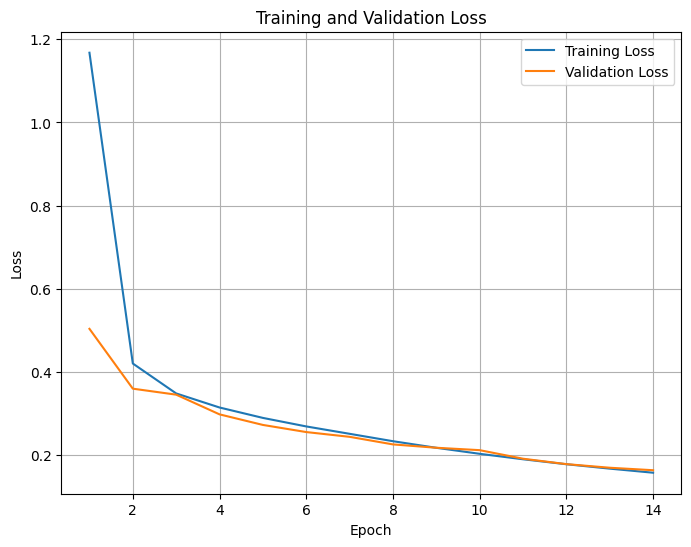

TEST Data Accuracy: 95.39%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
mnist_dataset_path = '../data'

# Check if GPU is available
device = torch.device("cpu")

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
train_data = datasets.MNIST(root=mnist_dataset_path, train=True, download=False, transform=transform)
test_data = datasets.MNIST(root=mnist_dataset_path, train=False, download=False, transform=transform)

# Split the training data into training and validation sets
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

# Create data loaders
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
valloader = DataLoader(val_data, batch_size=64, shuffle=False)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Move the model to GPU
model.to(device)

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Number of epochs to train the model
n_epochs = 14

# Lists to store training and validation losses
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    train_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Evaluate the model on validation data
    val_loss = 0
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)
            val_loss += loss.item()
    
    # Calculate average losses
    train_loss /= len(trainloader)
    val_loss /= len(valloader)
    
    # Store losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch+1} - Training loss: {train_loss:.4f} - Validation loss: {val_loss:.4f}")

print("Training completed.")

# Plot the training and validation losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the loaded model on the training data
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        logits = model(images)
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"TEST Data Accuracy: {accuracy:.2f}%")



In [3]:
len(train_data), len(test_data)

(48000, 10000)

In [4]:
# Evaluate the loaded model on the training data
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        logits = model(images)
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"TEST Data Accuracy: {accuracy:.2f}%")


TEST Data Accuracy: 95.39%
